In [9]:
#from pymatgen.io.cif import CifParser,CifWriter
from pymatgen.io.cif import CifParser, CifWriter
import numpy as np
from pymatgen import Lattice, Element
import pymatgen as p
from pymatgen.io.ase import  AseAtomsAdaptor as pyase
import sys
sys.path.insert(0, '/home/srr70/bin/')
#from lmf import *
import pickle

def transform(a_reduce=0.87,angle=-180,phi=0,move=0.93):
    parser = CifParser("../structures/dipoles.cif")
    structure = parser.get_structures()[0]
    coor=[]
    coord = structure.cart_coords[3]+structure.cart_coords[5]+structure.cart_coords[6]+structure.cart_coords[8]
    coord=coord/4
    coor=coord
    coord[2]=coord[2]*move
    new_a=structure.lattice.a*a_reduce

    structure.rotate_sites([3,5,6,8],np.deg2rad(angle),[0,1,0],coord)
    #CifWriter(structure).write_file("dipole_3.cif")
    
    structure.rotate_sites([3,5,6,8],np.deg2rad(phi),[1,0,0],coord)
    structure

    #print structure

    lattice = Lattice.from_parameters(a=new_a, b=structure.lattice.b, c=structure.lattice.c, alpha=90,
                                      beta=structure.lattice.beta, gamma=90)
    structure.modify_lattice(lattice)
    #print "\n########## new structure ################\n"
    #print structure

    CifWriter(structure).write_file("../structures/dipole_2.cif")
    return structure

#st.remove_species([Element("Rb")])
#transform(angle=62.5,phi=140,move=1)
transform(angle=0,phi=0,move=0)
!open ../structures/dipole_2.cif

/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: modify_lattice is deprecated
Simply set using Structure.lattice = lattice. This will be removed in pymatgen v2020.


In [ ]:
energy=[]
relax={}
a=[2,3,4,5,6,8,9]

for angle in np.linspace(0,180,10):
    structure=transform(a_reduce=1,angle=angle,move=.98)
    st=structure.copy()
    atoms=pyase.get_atoms(st)
    for i in range(len(atoms)):
        r=[1,1,1]
        if i in a:
            r=[0,0,0]
    relax[i]=r
    atoms.set_calculator(lmf(dyn_iter=30,relax=relax))
    pot=atoms.get_potential_energy()
    energy.append(pot)
    pickle.dump( energy, open( "energies", "wb" ) )
print("Calculation Done ############################################################################")

energy=[]
relax={}
a=[3,5,6,8]
angle=float(sys.argv[1])
structure=transform(a_reduce=1,angle=angle,move=.98)
st=structure.copy()
atoms=pyase.get_atoms(st)
for i in range(len(atoms)):
    r=[1,1,1]
    if i in a:
        r=[0,0,0]
    relax[i]=r
lmf(atoms,dyn_iter=30,relax=relax).make_ctrl(atoms)
print("Calculation Done ############################################################################")

In [ ]:
from pymatgen.io.cif import CifParser,CifWriter
import numpy as np
from pymatgen import Lattice, Element
import pymatgen as p
from pymatgen.io.ase import  AseAtomsAdaptor as pyase
import sys
sys.path.insert(0, '/home/srr70/bin/')
from lmf import *
import pickle

def transform(a_reduce=0.87,angle=-180,phi=0,move=0.93):
    parser = CifParser("dipoles1.cif")
    structure = parser.get_structures()[0]
    coor=[]
    coord = structure.cart_coords[3]+structure.cart_coords[5]+structure.cart_coords[6]+structure.cart_coords[8]
    coord=coord/4
    coor=coord
    coord[2]=coord[2]*move
    new_a=structure.lattice.a*a_reduce

    structure.rotate_sites([3,5,6,8],np.deg2rad(angle),[0,1,0],coord)
    #CifWriter(structure).write_file("dipole_3.cif")
    
    structure.rotate_sites([3,5,6,8],np.deg2rad(phi),[1,0,0],coord)
    structure

    #print structure

    lattice = Lattice.from_parameters(a=new_a, b=structure.lattice.b, c=structure.lattice.c, alpha=90,
                                      beta=structure.lattice.beta, gamma=90)
    structure.modify_lattice(lattice)
    #print "\n########## new structure ################\n"
    #print structure

    #CifWriter(structure).write_file("dipole_2.cif")
    return structure

#st.remove_species([Element("Rb")])
energy=[]
relax={}
a=[2,3,4,5,6,7,8,9]
angle=float(sys.argv[1])
phi=float(sys.argv[2])
structure=transform(a_reduce=1,angle=angle,phi=phi,move=.98)
st=structure.copy()
atoms=pyase.get_atoms(st)
for i in range(len(atoms)):
    r=[1,1,1]
    if i in a:
        r=[0,0,0]
    relax[i]=r
lmf(atoms,dyn_iter=30,relax=relax).make_ctrl(atoms)
print("Calculation Done ############################################################################")

In [8]:
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import scipy.interpolate as inter
data={0.0:[-25817.651985, 3.59662],
20.0:[-25817.6519622, 3.60272],
40.0:[-25817.6514051, 3.5833],
60.0:[-25817.6516298, 3.6026],
80.0:[-25817.6371833, 3.39987],
100.0:[-25817.5815433, 3.22884],
120.0:[-25817.4892366, 2.44018],
140.0:[-25817.5079441, 2.49472],
160.0:[-25817.6271296, 2.50604],
180.0:[-25817.6438885, 2.50503],
200.0:[-25817.6361775, 2.50857],
220.0:[-25817.6157228, 2.96102],
240.0:[-25817.6144342, 2.98451],
260.0:[-25817.6101179, 3.43198],
280.0:[-25817.6211941, 3.48046],
300.0:[-25817.6498531, 3.56002],
320.0:[-25817.6519973, 3.59696],
340.0:[-25817.6519973, 3.59779]}

/usr/local/Cellar/python/3.7.3/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


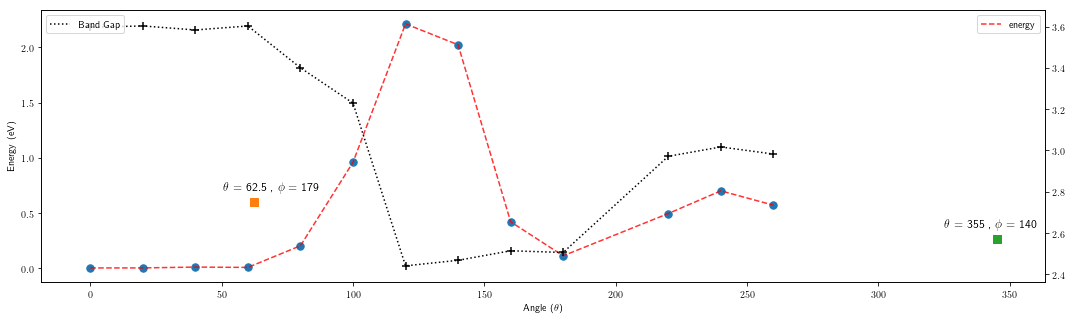

In [139]:
x=np.array(list(data.keys()))
y=np.array(list(data.values()))[:,0]

x_dot=62.5
y_dot=(-25817.6080602-np.min(y))*13.6056980659

x_dot1=345
y_dot1=(-25817.6326674-np.min(y))*13.6056980659


y=(y-np.min(y))*13.6056980659 
y1=np.array(list(data.values()))[:,1]
xx = np.linspace(min(x),max(x),100)
cs = CubicSpline(x, y)

fig,ax=plt.subplots(1,1,figsize=(18,5))
ax.scatter(x,y,s=55)

# s=0.0025
# s2 = inter.UnivariateSpline (x, y, s=s)
# plt.plot(xx, s2(xx), 'b--', label='Spline s = {}'.format(s),alpha=.5)

 
ax.scatter(x_dot,y_dot,s=65,marker="s")
ax.annotate(r"$\theta$ = 62.5 , $\phi$ = 179",(x_dot-12,y_dot+.1),size=12)

ax.scatter(x_dot1,y_dot1,s=65,marker="s")
ax.annotate(r"$\theta$ = 355 , $\phi$ = 140",(x_dot1-20,y_dot1+.1),size=12)
# s=1
# s2 = inter.UnivariateSpline (x, y, s=s)
# plt.plot(xx, s2(xx), 'r--', label='Spline s = {}'.format(s),alpha=.5)

s=5e-3
s2 = inter.UnivariateSpline (x, y, s=s)
#ax.plot(xx, s2(xx), 'g--', label='Spline s = {}'.format(s),alpha=.3)
ax.plot(x, y, 'r--', label='energy',alpha=.8)
ax.legend()
ax1 = ax.twinx() 
ax1.plot(x,y1,label="Band Gap",color="black",linestyle=":")
ax1.scatter(x,y1,color="black",s=55,marker="+")
ax1.legend(loc=2)
ax.set_ylabel("Energy (eV)")
ax.set_xlabel(r"Angle ($\theta$)")
#plt.savefig("band-energies-62140.png",dpi=400)

plt.show()

## Run this if there is no Pickle, skip if you want to read from Pickle

In [1021]:
import pickle
n=100

angles_theta=np.linspace(0,360,2*n)
angles_phi=np.linspace(0,180,n+1) 
angles=[]
angles_var=[]
k=6
for phi in angles_phi:
    t=[]
    var=[]
    val1=[]
    val2=[]
    for theta in angles_theta:
        structure=transform(a_reduce=1,angle=theta,move=1,phi=phi)
        #angle - 0-360
        #phi- 0-180
        dist1=[]
        dist2=[]
        for i in structure.get_neighbors(structure[2],10):
                #dist.append(i[1])
                #pos= i[0].coords/scale
                if i[0].species_string=="Cl":
                    dist1.append(i[1])
        val1.append(np.sort(dist1)[0:k])
        for i in structure.get_neighbors(structure[3],10):
                #dist.append(i[1])
                #pos= i[0].coords/scale
                if i[0].species_string=="Cl":
                    dist2.append(i[1])
        val2.append(np.sort(dist2)[0:k])
    t=(np.array(val1).mean(axis=1)+np.array(val2).mean(axis=1))/2.
    var=(np.var(val1,axis=1)+np.var(val2,axis=1))/2
    angles.append(t)
    angles_var.append(var)
angles=np.array(angles)
angles_var=np.array(angles_var)
pickle.dump(angles,open("angles_nn.pickle", "wb"))
pickle.dump(angles_var,open("angles_nn_var.pickle", "wb"))

In [56]:
angles=pickle.load(open("angles_nn.pickle", "rb"))
angles_var=pickle.load(open("angles_nn_var.pickle", "rb"))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: ResourceWarning: unclosed file <_io.BufferedReader name='angles_nn.pickle'>
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: ResourceWarning: unclosed file <_io.BufferedReader name='angles_nn_var.pickle'>
  


In [14]:
# Coordinate arrays for the graphical representation
import matplotlib

x = np.linspace(-np.pi, np.pi, len(angles[0]))
y = np.linspace(-np.pi/2, np.pi/2, len(angles))
X, Y = np.meshgrid(x, y)
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

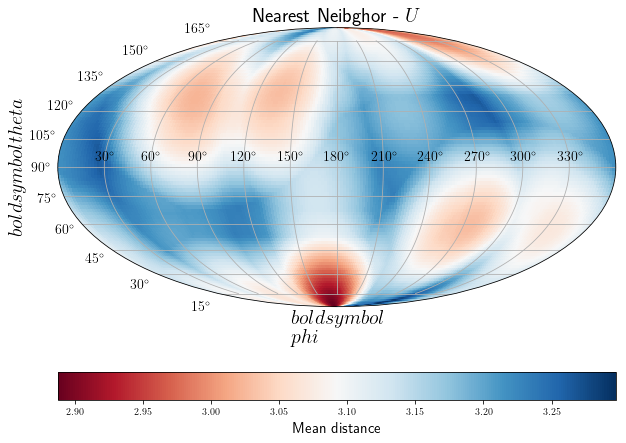

In [16]:
xlabels = ['$30^\\circ$', '$60^\\circ$','$90^\\circ$','$120^\\circ$','$150^\\circ$',
           '$180^\\circ$', '$210^\\circ$', '$240^\\circ$', '$270^\\circ$','$300^\\circ$', '$330^\\circ$']

ylabels = ['$165^\\circ$', '$150^\\circ$', '$135^\\circ$', '$120^\\circ$', 
           '$105^\\circ$', '$90^\\circ$', '$75^\\circ$', '$60^\\circ$',
           '$45^\\circ$','$30^\\circ$','$15^\\circ$']
ylabels.reverse()
fig, ax = plt.subplots(subplot_kw=dict(projection='mollweide'), figsize=(10,8))
im = ax.pcolormesh(X, Y , angles,cmap=plt.cm.RdBu)
ax.set_xticklabels(xlabels, fontsize=14)
ax.set_yticklabels(ylabels, fontsize=14)
ax.set_title('Nearest Neibghor - $U$', fontsize=20)
ax.set_xlabel(r'$\\boldsymbol \\phi$', fontsize=20)
ax.set_ylabel(r'$\\boldsymbol{\\theta}$', fontsize=20)
ax.grid()
fig.colorbar(im, orientation='horizontal').set_label(label="Mean distance",size=15,weight='bold') 
#plt.savefig("mollewide-U.png",dpi=400)
plt.show()

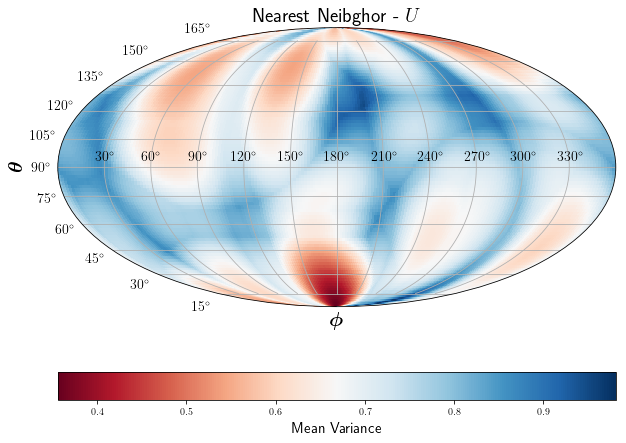

In [1030]:
xlabels = ['$30^\circ$', '$60^\circ$','$90^\circ$','$120^\circ$','$150^\circ$',
           '$180^\circ$', '$210^\circ$', '$240^\circ$', '$270^\circ$','$300^\circ$', '$330^\circ$']

ylabels = ['$165^\circ$', '$150^\circ$', '$135^\circ$', '$120^\circ$', 
           '$105^\circ$', '$90^\circ$', '$75^\circ$', '$60^\circ$',
           '$45^\circ$','$30^\circ$','$15^\circ$']
ylabels.reverse()
fig, ax = plt.subplots(subplot_kw=dict(projection='mollweide'), figsize=(10,8))
im = ax.pcolormesh(X, Y , angles_var,cmap=plt.cm.RdBu)
ax.set_xticklabels(xlabels, fontsize=14)
ax.set_yticklabels(ylabels, fontsize=14)
ax.set_title('Nearest Neibghor - $U$', fontsize=20)
ax.set_xlabel(r'$\boldsymbol \phi$', fontsize=20)
ax.set_ylabel(r'$\boldsymbol{\theta}$', fontsize=20)
ax.grid()
fig.colorbar(im, orientation='horizontal').set_label(label="Mean Variance",size=15,weight='bold') 
#plt.savefig("mollewide-U-Var.png",dpi=400)
plt.show()

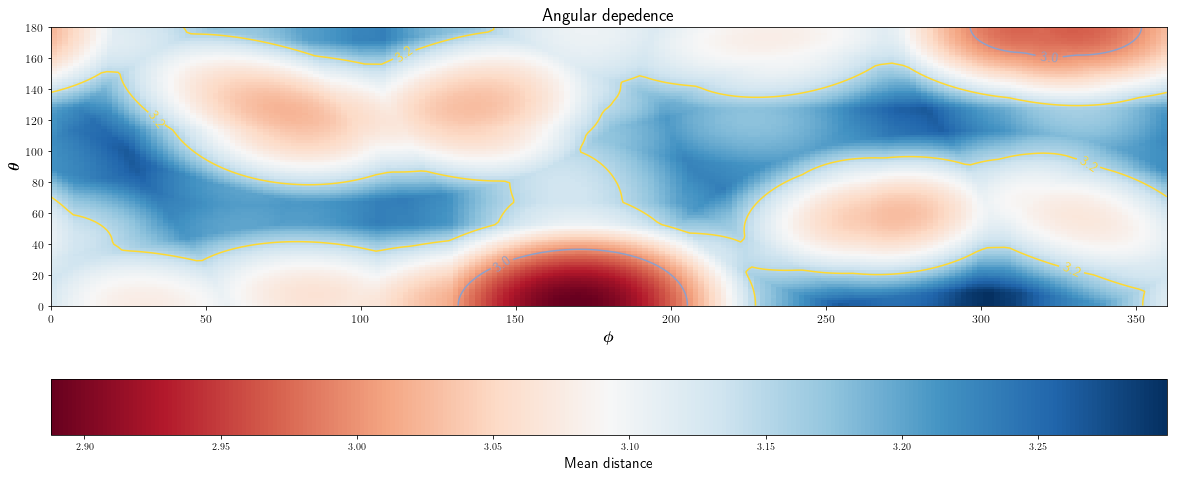

In [1019]:
x = np.linspace(0, 360, len(angles[0]))
y = np.linspace(180, 0,  len(angles))
X, Y = np.meshgrid(x, y)
Z=np.flip(angles,axis=0)
fig,ax=plt.subplots(figsize=(20,9))
im = plt.imshow(Z, cmap=plt.cm.RdBu,extent=(np.amin(X), np.amax(X), np.amin(Y), np.amax(Y)),aspect=.5)  
cset = plt.contour(Z,3,cmap=plt.cm.Set2,extent=(np.amin(X), np.amax(X), np.amax(Y), np.amin(Y)))
plt.clabel(cset, inline=True, fmt='%1.1f', fontsize=14)
plt.colorbar(im,orientation='horizontal').set_label(label="Mean distance",size=15,weight='bold')  
plt.ylabel(r"$\boldsymbol \theta$",fontsize=15)
plt.xlabel(r"$\boldsymbol \phi$",fontsize=15)
plt.title('Angular depedence',fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.savefig("General-U-angles.png",dpi=400)
plt.show()

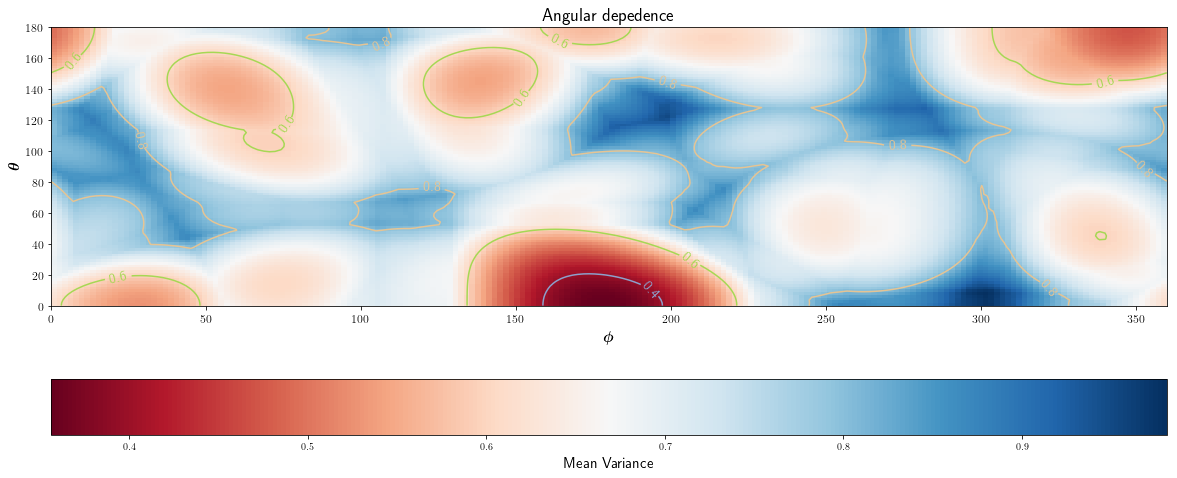

In [1075]:
x = np.linspace(0, 360, len(angles[0]))
y = np.linspace(180, 0,  len(angles))
X, Y = np.meshgrid(x, y)
Z=np.flip(angles_var,axis=0)
fig,ax=plt.subplots(figsize=(20,9))
im = plt.imshow(Z, cmap=plt.cm.RdBu,extent=(np.amin(X), np.amax(X), np.amin(Y), np.amax(Y)),aspect=.5)  
cset = plt.contour(Z,3,cmap=plt.cm.Set2,extent=(np.amin(X), np.amax(X), np.amax(Y), np.amin(Y)))
plt.clabel(cset, inline=True, fmt='%1.1f', fontsize=14)
plt.colorbar(im,orientation='horizontal').set_label(label="Mean Variance",size=15,weight='bold')  
plt.ylabel(r"$\boldsymbol \theta$",fontsize=15)
plt.xlabel(r"$\boldsymbol \phi$",fontsize=15)
plt.title('Angular depedence',fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# for i in range(0,180,30):
#     plt.axhline(i,linestyle=":",alpha=.5)
#plt.savefig("General-U-angles-var.png",dpi=400)
plt.show()

In [1431]:
theta=62.5                #360
phi=140                 #180
structure=transform(a_reduce=1,angle=theta,move=1,phi=phi)
CifWriter(structure).write_file("dipole_2.cif")

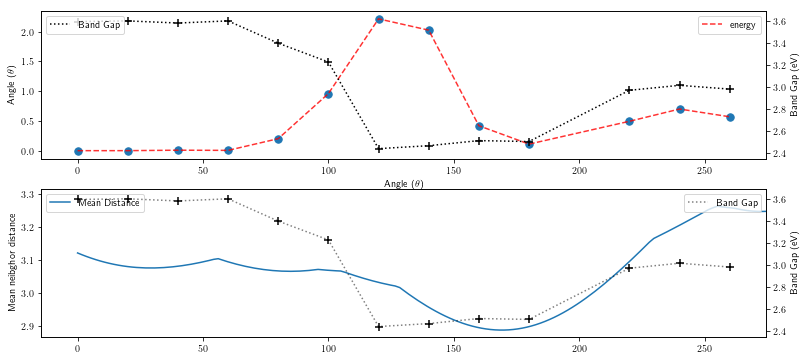

In [1404]:
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import scipy.interpolate as inter
data={0.0:[-25817.651985, 3.59662],
20.0:[-25817.6519622, 3.60272],
40.0:[-25817.6514051, 3.5833],
60.0:[-25817.6516298, 3.6026],
80.0:[-25817.6371833, 3.39987],
100.0:[-25817.5815433, 3.22884],
120.0:[-25817.4892366, 2.44018],
140.0:[-25817.5031785, 2.467],
160.0:[-25817.6212143, 2.5132],
180.0:[-25817.6438885, 2.50503],
220.0:[-25817.6157228, 2.97102],
240.0:[-25817.6005773, 3.01634],
260.0:[-25817.6101179, 2.98198]}




x=np.array(list(data.keys()))
y=np.array(list(data.values()))[:,0]
y=(y-np.min(y))*13.6056980659 
y1=np.array(list(data.values()))[:,1]
xx = np.linspace(min(x),max(x),100)
cs = CubicSpline(x, y)

fig,ax=plt.subplots(2,1,figsize=(13,6))
ax[0].scatter(x,y,s=55)

# s=0.0025
# s2 = inter.UnivariateSpline (x, y, s=s)
# plt.plot(xx, s2(xx), 'b--', label='Spline s = {}'.format(s),alpha=.5)



# s=1
# s2 = inter.UnivariateSpline (x, y, s=s)
# plt.plot(xx, s2(xx), 'r--', label='Spline s = {}'.format(s),alpha=.5)

s=5e-3
s2 = inter.UnivariateSpline (x, y, s=s)
#ax[0].plot(xx, s2(xx), 'g--', label='Spline s = {}'.format(s),alpha=.3)
ax[0].plot(x, y, 'r--', label='energy',alpha=.8)
ax[0].legend()
ax1 = ax[0].twinx() 
ax1.set_ylabel("Band Gap (eV)")
ax1.plot(x,y1,label="Band Gap",color="black",linestyle=":")
ax1.scatter(x,y1,color="black",s=55,marker="+")
ax1.legend(loc=2)
ax[0].set_ylabel("Energy (eV)")
ax[0].set_xlabel(r"Angle ($\theta$)")
ax[0].set_ylabel(r"Angle ($\theta$)")
x1=np.linspace(0,360,len(angles[0]))
ax[1].plot(x1,angles[0],label="Mean Distance")
ax1 = ax[1].twinx()
xmin,xmax=ax[0].get_xlim()
ax[1].set_xlim([xmin,xmax])
ax1.set_xlim([xmin,xmax])
ax[1].legend()
ax1.plot(x,y1,label="Band Gap",color="black",linestyle=":",alpha=.5)
ax1.scatter(x,y1,color="black",s=55,marker="+")
ax1.legend(loc=1)
ax1.set_ylabel("Band Gap (eV)")
ax[1].set_ylabel("Mean neibghor distance")
#plt.savefig("band-energie-NN.png",dpi=400)
plt.show()

In [1405]:
from pymatgen import Structure
parser = CifParser("dipoles.cif")
structure = parser.get_structures()[0]
cl=[]
for i in structure.get_neighbors(structure[3],3.5):
                if i[0].species_string=="Cl":
                    cl.append(i)
                    #dist1.append(i[1])
                
# coord1 = structure.cart_coords[3]+structure.cart_coords[5]+structure.cart_coords[6]+structure.cart_coords[8]
# coord1=coord1/4
# coord2 = structure.cart_coords[2]+structure.cart_coords[4]+structure.cart_coords[7]+structure.cart_coords[9]
# coord12=coord2/4
# lattice = Lattice.from_parameters(a=structure.lattice.a, b=structure.lattice.b, c=structure.lattice.c, alpha=90,
#                                       beta=structure.lattice.beta, gamma=90)

# s=Structure(lattice,["Ge","Si"],[coord1,coord2],coords_are_cartesian=True,to_unit_cell=True)
# CifWriter(s).write_file("config.cif")


In [6]:
# code snippet to rotate and draw small arrow like bonds in the tetra headron space ! 
from pymatgen.analysis.local_env import JmolNN as nn
from pymatgen import Structure
parser = CifParser("dipoles.cif")
structure = parser.get_structures()[0]
plot={}
H=[]
He=[]
for i in range(len(structure)):
    if structure[i].species_string=="Ge": 
        NN=nn().get_nn_info(structure=structure,n=i)
        #print(len(NN),"\n")
        t=np.zeros(np.shape([0,0,0]))
        for j in NN:
#             for y in range(3):
#                temp=structure.lattice.matrix[y]*j["image"][y]
            t+=j['site'].coords#+temp
        t+=structure[i].coords
        t=t/4
        #print(t)
        He.append(t)
        H.append(structure[i].coords)
names=[]
pos=[]
for i in range(len(H)):
    names.append("H")
    pos.append(H[i])
    names.append("He")
    pos.append(He[i])
s=Structure(structure.lattice,names,pos,coords_are_cartesian=True)
CifWriter(s).write_file("config.cif")
CifWriter(structure).write_file("config1.cif")

/usr/local/lib/python3.7/site-packages/pymatgen/core/periodic_table.py:427: UserWarning: No electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  % self.symbol)


In [1418]:
def dot(r1,r2):
    theta1=np.deg2rad(r1[1])
    theta2=np.deg2rad(r2[1])
    phi1=np.deg2rad(r1[0])
    phi2=np.deg2rad(r2[0])
    return np.sin(theta1)*np.sin(theta2)*np.cos(phi1-phi2)+np.cos(theta1)*np.cos(theta2)
#[theta,phi]
rx=[0,90]
ry=[90,90]
rz=[90,0]
dot(rx,ry)

6.123233995736766e-17

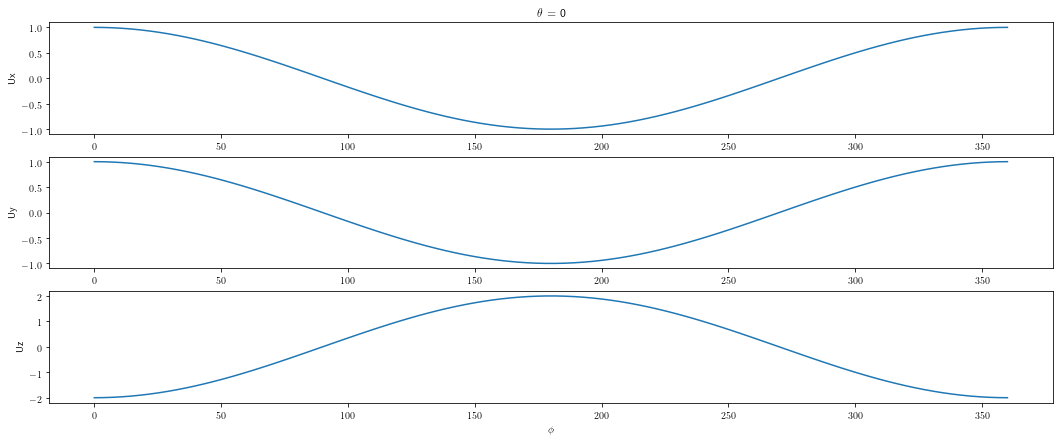

In [1419]:
Uz=[]
Ux=[]
Uy=[]
phi=np.linspace(0,360,100)
for i in phi:
    s1=rz
    s2=[0,i]
    Uz.append(dot(s1,s2)-3*dot(s1,rz)*dot(s2,rz))
    Ux.append(dot(s1,s2)-3*dot(s1,rx)*dot(s2,rx))
    Uy.append(dot(s1,s2)-3*dot(s1,ry)*dot(s2,ry))
fig,ax=plt.subplots(3,1,figsize=(18,7))
ax[0].plot(phi,Ux)
ax[0].set_ylabel("Ux")
ax[1].plot(phi,Uy)
ax[1].set_ylabel("Uy")
ax[2].plot(phi,Uz)
ax[2].set_ylabel("Uz")
ax[2].set_xlabel("$\phi$")
ax[0].set_title(r"$\theta$ = 0 ")
#plt.savefig("UxUyUz_90.png",dpi=300)

plt.show()

## Dont excute the bellow cell if you want to load from Pickle ! 

In [1423]:
import pickle
Uz=[]
Ux=[]
Uy=[]
phi=np.linspace(-180,180,200)
theta=np.linspace(0,180,100)
for j in theta:
    temp_Ux=[]
    temp_Uy=[]
    temp_Uz=[]
    for i in phi:
        s1=rx
        s2=[j,i]
        temp_Uz.append(dot(s1,s2)-3*dot(s1,rz)*dot(s2,rz))
        temp_Ux.append(dot(s1,s2)-3*dot(s1,rx)*dot(s2,rx))
        temp_Uy.append(dot(s1,s2)-3*dot(s1,ry)*dot(s2,ry))
    Ux.append(temp_Ux)
    Uy.append(temp_Uy)
    Uz.append(temp_Uz)
U={"Ux":np.array(Ux),"Uy":np.array(Uy),"Uz":np.array(Uz)}
pickle.dump(U,open("U_rx.pickle", "wb"))

In [22]:
angles=pickle.load(open("angles_nn.pickle", "rb"))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ResourceWarning: unclosed file <_io.BufferedReader name='angles_nn.pickle'>
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: ResourceWarning: unclosed file <_io.BufferedReader name='U_rx.pickle'>
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: ResourceWarning: unclosed file <_io.BufferedReader name='U_ry.pickle'>
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: ResourceWarning: unclosed file <_io.BufferedReader name='U_rz.pickle'>
  import sys


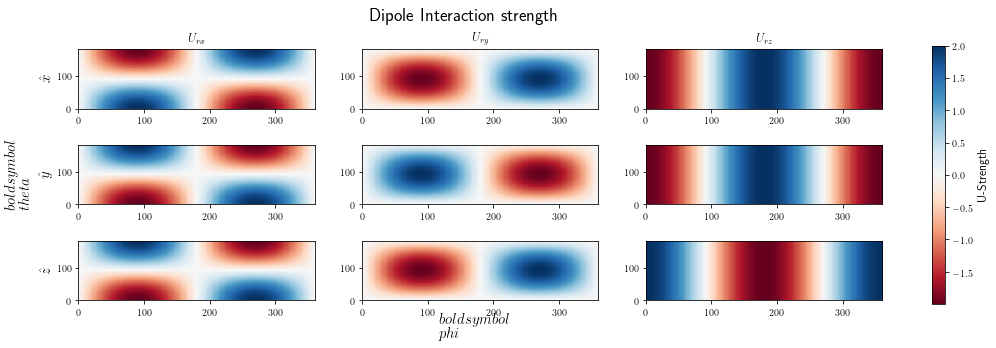

In [24]:
fig,ax=plt.subplots(3,3,figsize=(18,5))
files=["U_rx","U_ry","U_rz"]
l=0
names=["$U_{rx}$","$U_{ry}$","$U_{rz}$"]
y_names=["$\\hat{x}$","$\\hat{y}$","$\\hat{z}$"]
for fname in files:
    U=pickle.load(open(fname+".pickle", "rb"))
    k=0
    ax[0][l].title.set_text(names[l])
    for Us in [U["Ux"],U["Uy"],U["Uz"]]:
        plot=Us
        x = np.linspace(0, 360, len(plot[0]))
        y = np.linspace(180, 0,  len(plot))
        X, Y = np.meshgrid(x, y)
        Z=np.flip(plot,axis=0)

        im = ax[k][l].imshow(Z, cmap=plt.cm.RdBu,extent=(np.amin(X), np.amax(X), np.amin(Y), np.amax(Y)),aspect=.5)  
        #cset = plt.contour(Z,3,cmap=plt.cm.Set2,extent=(np.amin(X), np.amax(X), np.amax(Y), np.amin(Y)))
        #plt.clabel(cset, inline=True, fmt='%1.1f', fontsize=14)
        #plt.colorbar(im,orientation='horizontal').set_label(label="Mean Variance",size=15,weight='bold')  
        #ax[k][0].set_ylabel(r"$\\boldsymbol \\theta$",fontsize=15)
        #ax[2][0].set_xlabel(r"$\\boldsymbol \\phi$",fontsize=15)
        ax[k][0].set_ylabel(y_names[k],fontsize=15)
        #ax[k].xticks(fontsize=12)
        #ax[k].yticks(fontsize=12)
        # for i in range(0,180,30):
        #     plt.axhline(i,linestyle=":",alpha=.5)
        #plt.savefig("General-U-angles-var.png",dpi=400)
        k=k+1
    l+=1
    
fig.colorbar(im,orientation='vertical',ax=ax.ravel().tolist(), shrink=0.95).set_label(label="U-Strength",size=12,weight='bold')  

fig.text(0.35, .93,'Dipole Interaction strength',fontsize=18)
fig.text(0.43, 0.05, r"$\\boldsymbol \\phi$",fontsize=15, ha='center')
fig.text(.07, 0.5, r"$\\boldsymbol \\theta$",fontsize=15, va='center', rotation='vertical')
#plt.tight_layout()
plt.savefig("Dipole-Inter_full.png",dpi=400)
plt.show()

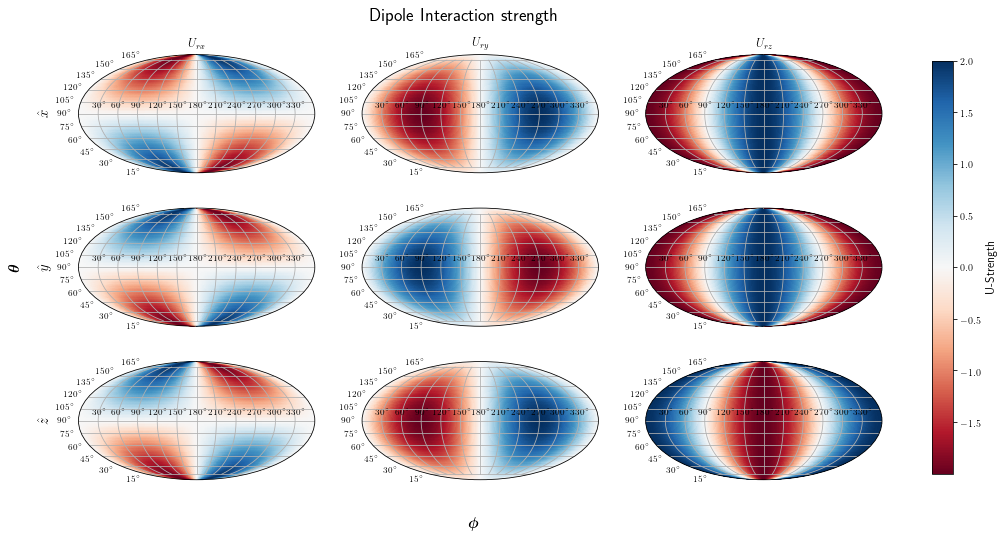

In [1427]:
# Coordinate arrays for the graphical representation
import matplotlib
files=["U_rx","U_ry","U_rz"]
l=0
names=["$U_{rx}$","$U_{ry}$","$U_{rz}$"]
y_names=["$\hat{x}$","$\hat{y}$","$\hat{z}$"]
fig, ax = plt.subplots(3,3,subplot_kw=dict(projection='mollweide'), figsize=(18,8))
for fname in files:
    U=pickle.load(open(fname+".pickle", "rb"))
    k=0
    ax[0][l].title.set_text(names[l])
    for Us in [U["Ux"],U["Uy"],U["Uz"]]:
        plot=Us
        x = np.linspace(-np.pi, np.pi, len(angles[0]))
        y = np.linspace(-np.pi/2, np.pi/2, len(angles))
        X, Y = np.meshgrid(x, y)
        matplotlib.rc('text', usetex=True)
        matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
        xlabels = ['$30^\circ$', '$60^\circ$','$90^\circ$','$120^\circ$','$150^\circ$',
                   '$180^\circ$', '$210^\circ$', '$240^\circ$', '$270^\circ$','$300^\circ$', '$330^\circ$']

        ylabels = ['$165^\circ$', '$150^\circ$', '$135^\circ$', '$120^\circ$', 
                   '$105^\circ$', '$90^\circ$', '$75^\circ$', '$60^\circ$',
                   '$45^\circ$','$30^\circ$','$15^\circ$']
        ylabels.reverse()
        ax[k][0].set_ylabel(y_names[k],fontsize=15)
        im = ax[k][l].pcolormesh(X, Y , plot,cmap=plt.cm.RdBu)
        ax[k][l].set_xticklabels(xlabels, fontsize=9)
        ax[k][l].set_yticklabels(ylabels, fontsize=9)
        #ax[k][l].set_title('Nearest Neibghor - $U$', fontsize=20)
        #ax[k][l].set_xlabel(r'$\boldsymbol \phi$', fontsize=15)
        #ax[k][l].set_ylabel(r'$\boldsymbol{\theta}$', fontsize=15)
        ax[k][l].grid()
        k=k+1
    l=l+1
        #fig.colorbar(im, orientation='horizontal').set_label(label="Mean Variance",size=15,weight='bold') 
        #plt.savefig("mollewide-U-Var.png",dpi=400)
fig.colorbar(im,orientation='vertical',ax=ax.ravel().tolist(), shrink=0.95).set_label(label="U-Strength",size=12,weight='bold')  

fig.text(0.35, .93,'Dipole Interaction strength',fontsize=18)
fig.text(0.43, 0.05, r"$\boldsymbol \phi$",fontsize=15, ha='center')
fig.text(.07, 0.5, r"$\boldsymbol \theta$",fontsize=15, va='center', rotation='vertical')
plt.savefig("Dipole-Inter_full_molly.png",dpi=400)
plt.show()

In [25]:
with open("U_rz.pickle", "rb") as f:
    U = pickle.load(f)
data={0.0:[-25817.651985, 3.59662],
20.0:[-25817.6519622, 3.60272],
40.0:[-25817.6514051, 3.5833],
60.0:[-25817.6516298, 3.6026],
80.0:[-25817.6371833, 3.39987],
100.0:[-25817.5815433, 3.22884],
120.0:[-25817.4892366, 2.44018],
140.0:[-25817.5031785, 2.467],
160.0:[-25817.6212143, 2.5132],
180.0:[-25817.6438885, 2.50503],
220.0:[-25817.6157228, 2.97102],
240.0:[-25817.6005773, 3.01634],
260.0:[-25817.6101179, 2.98198]}




x=np.array(list(data.keys()))
y=np.array(list(data.values()))[:,0]
y=(y-np.min(y))*13.6056980659 

NameError: name 'angles_var' is not defined

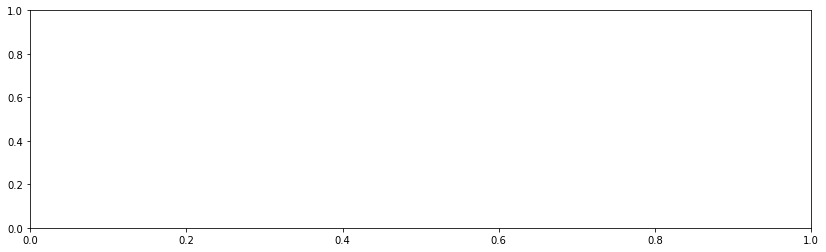

In [26]:
fig, ax = plt.subplots(1,1, figsize=(14,4))
g=8.6
g1=10
E=(U["Ux"][0]+g*angles[0])/15
E1=(U["Ux"][0]+g1*angles_var[0])
thetas=np.linspace(0,360,len(E))
ax.plot(thetas,np.flip(E))
#ax.plot(thetas,np.flip(E1))
ax1 = ax.twinx() 
ax1.plot(x,y,c="red")
plt.show()

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='t', max=5.0, min=-5.0, step…

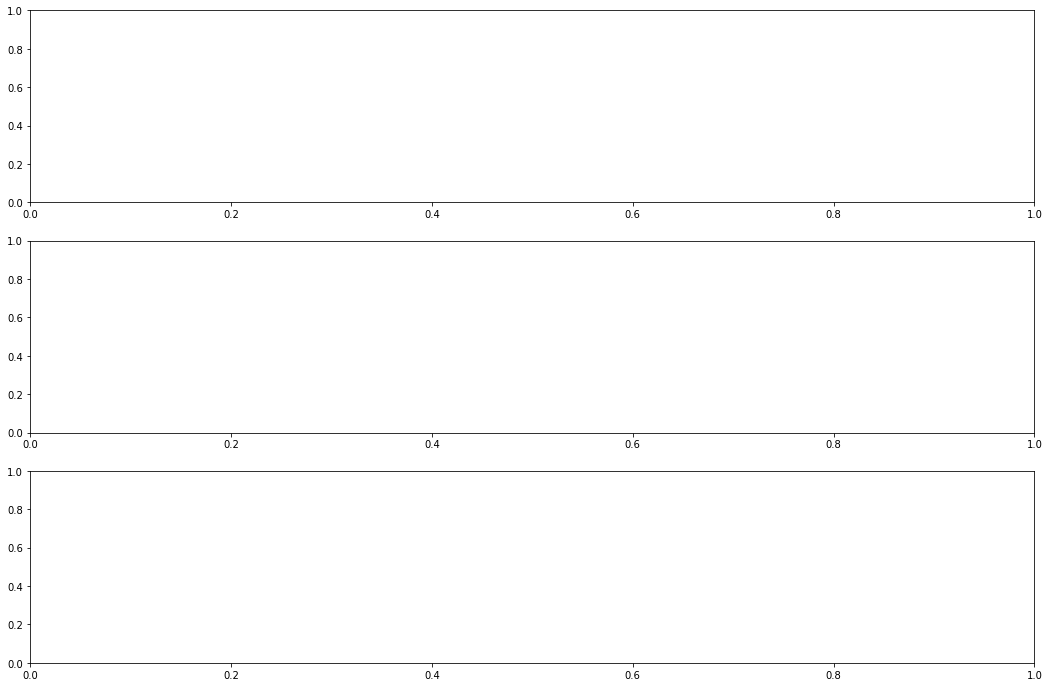

In [23]:
from ipywidgets import *
import matplotlib.pyplot as plt
g=8.6
t=0
def f(t=0):
    E_tot=U["Ux"]+(g+t)*angles[:-1]
    fig,ax=plt.subplots(3,1,figsize=(18,12))
    x = np.linspace(0, 360, len(plot[0]))
    y = np.linspace(180, 0,  len(plot))
    X, Y = np.meshgrid(x, y)
    im = ax[0].imshow(np.flip(U["Ux"],axis=0), cmap=plt.cm.RdBu,extent=(np.amin(X), np.amax(X), np.amin(Y), np.amax(Y)),aspect=.5) 
    im = ax[1].imshow(np.flip(angles[:-1],axis=0), cmap=plt.cm.RdBu,extent=(np.amin(X), np.amax(X), np.amin(Y), np.amax(Y)),aspect=.5) 
    im = ax[2].imshow(np.flip(E_tot,axis=0), cmap=plt.cm.RdBu,extent=(np.amin(X), np.amax(X), np.amin(Y), np.amax(Y)),aspect=.5) 
    ax[0].set_title("Dipole Energy")
    ax[1].set_title("Bonding term $U_x$")
    ax[2].set_title("Total Energy")
    fig.colorbar(im,orientation='vertical',ax=ax.ravel().tolist(), shrink=0.95).set_label(label="U-Strength",size=12,weight='bold')  
    #plt.tight_layout()
    #plt.show()
    fig.canvas.draw()
    #display(fig)

#f()
interact(f, t=widgets.FloatSlider(min=-5,max=5,step=.2,value=0, continuous_update=False));

In [131]:
transform(angle=340,phi=175,move=1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: modify_lattice is deprecated
Simply set using Structure.lattice = lattice. This will be removed in pymatgen v2020.


Structure Summary
Lattice
    abc : 5.145501900000002 7.19642 8.36143
 angles : 90.0 107.59318 90.0
 volume : 295.135179741797
      A : 4.90482955192066 0.0 -1.5552610293804083
      B : -4.4065363591599975e-16 7.19642 4.4065363591599975e-16
      C : 0.0 0.0 8.36143
PeriodicSite: Rb (3.2152, 0.0000, 3.7786) [0.6555, 0.0000, 0.5738]
PeriodicSite: Rb (0.0056, 3.5982, 1.4400) [0.0011, 0.5000, 0.1724]
PeriodicSite: Ge (1.9619, 0.0000, 7.7393) [0.4000, 0.0000, 1.0000]
PeriodicSite: Ge (1.0096, 3.5335, 4.2065) [0.2058, 0.4910, 0.5414]
PeriodicSite: Cl (4.8935, 0.0000, 6.7306) [0.9977, 0.0000, 0.9905]
PeriodicSite: Cl (3.0542, 3.5183, 4.1298) [0.6227, 0.4889, 0.6097]
PeriodicSite: Cl (0.9256, 5.4089, 5.6171) [0.1887, 0.7516, 0.7069]
PeriodicSite: Cl (2.5088, 5.4515, 0.8486) [0.5115, 0.7575, 0.1966]
PeriodicSite: Cl (0.9256, 1.9322, 5.9213) [0.1887, 0.2685, 0.7433]
PeriodicSite: Cl (2.5088, 1.7450, 0.8486) [0.5115, 0.2425, 0.1966]